In [2]:
#in anaconda prompt
#pip install awscli
#pip install boto3
#pip install ibm-cos-sdk
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_fb94599401f941e3b82ede780614e140 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='heBtJWjH85ENaD4-BVVy2c5_KJIpRHOjhsKrEcHsR4fm',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_fb94599401f941e3b82ede780614e140.get_object(Bucket='ist718-donotdelete-pr-p3ohojqfnefaum',Key='ks-projects-201801.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

kickstarter = pd.read_csv(body)
kickstarter.head()



,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [19]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
from pandas.tools.plotting import scatter_matrix  # scatter plot matrix
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
import matplotlib.pyplot as plt  # 2D plotting

In [5]:
# CleanData
#Check for NaN's
kickstarter.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [6]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [7]:
#drop.nans
kickstarternew = kickstarter.dropna()
kickstarternew.isnull().sum()
kickstarternew.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [60]:
kickstarternew['percent_pledged'] = (kickstarternew['pledged'] / kickstarternew['goal'])

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
#look at rows with percent pledged greater than 100
#data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]
#data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]
kickstarternew.loc[(kickstarternew["percent_pledged"] > 100)]

#there are many rows with goals of $1, this blows the percentage out by a lot

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,percent_pledged
363,1001685760,Wholesters- A new way to Whold your things!,Fashion,Fashion,USD,2011-05-29,1.0,2011-04-29 01:03:16,566.00,successful,3,US,566.00,566.00,1.00,566.000000
448,1002131859,Midwest Side Stories,Country & Folk,Music,USD,2016-09-12,20.0,2016-08-10 16:47:26,5075.00,successful,152,US,1380.00,5075.00,20.00,253.750000
993,1005030157,Tons Of Music For A Buck!!!,Rock,Music,USD,2015-08-15,1.0,2015-07-16 23:41:20,113.00,successful,13,US,113.00,113.00,1.00,113.000000
1873,1009661017,Redefining Italian Luxury Watches - Filippo Lo...,Design,Design,EUR,2016-12-16,20000.0,2016-11-16 21:00:44,4809548.00,successful,18550,NL,239150.72,5020667.05,20877.92,240.477400
1959,1010207468,Kenophania: How A Song Is Created (Interactive...,Audio,Journalism,GBP,2017-11-19,1.0,2017-11-01 20:03:10,698.91,successful,89,GB,23.20,931.43,1.33,698.910000
2313,1011998668,Stadium Re-boot!,Tabletop Games,Games,USD,2017-04-03,35.0,2017-02-17 22:24:58,4479.00,successful,82,US,1410.00,4479.00,35.00,127.971429
3381,1017454,The Forest or: How I Learned to Love the Pine ...,Film & Video,Film & Video,USD,2015-04-26,1.0,2015-04-20 17:03:18,167.00,successful,9,US,167.00,167.00,1.00,167.000000
4406,1022576045,Polygons | The Flat 4-in-1 Measuring Spoon,Product Design,Design,USD,2016-11-20,10000.0,2016-10-11 17:57:34,1022120.70,successful,36863,US,135121.00,1022120.70,10000.00,102.212070
4818,1024582936,The $1 Play What You Want Mystery Campaign RPG...,Games,Games,USD,2015-12-17,1.0,2015-11-17 20:32:29,4773.91,successful,1499,US,4773.91,4773.91,1.00,4773.910000
5651,1028973254,Crap Drawings,Illustration,Art,GBP,2012-12-16,1.0,2012-11-16 18:55:52,144.05,successful,17,GB,228.26,233.70,1.62,144.050000


In [67]:
#df[(df > 3).sum(axis=1) >= 3]
kickstarternew[kickstarternew["percent_pledged"] >= 100].sum()

ID                                                       406942954348
name                Wholesters- A new way to Whold your things!Mid...
category            FashionCountry & FolkRockDesignAudioTabletop G...
main_category       FashionMusicMusicDesignJournalismGamesFilm & V...
currency            USDUSDUSDEURGBPUSDUSDUSDUSDGBPUSDGBPUSDUSDCADU...
deadline            2011-05-292016-09-122015-08-152016-12-162017-1...
goal                                                           724097
launched            2011-04-29 01:03:162016-08-10 16:47:262015-07-...
pledged                                                   1.27251e+08
state               successfulsuccessfulsuccessfulsuccessfulsucces...
backers                                                       1218204
country             USUSUSNLGBUSUSUSUSGBUSGBUSUSCAUSUSUSUSUSUSUSCA...
usd pledged                                                7.2811e+07
usd_pledged_real                                          1.25831e+08
usd_goal_real       

In [61]:
kickstarternew.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,percent_pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0.080700
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0.004889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0.000200
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0.065795


In [50]:
#determine datatypes
kickstarternew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 16 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
percent_pledged     374860 non-null float64
dtypes: float64(6), int64(2), object(8)
memory usage: 58.6+ MB


In [62]:
#descriptive statistics
print(kickstarternew.describe())

                 ID          goal       pledged        backers   usd pledged  \
count  3.748600e+05  3.748600e+05  3.748600e+05  374860.000000  3.748600e+05   
mean   1.074652e+09  4.952299e+04  9.750538e+03     106.688366  7.036802e+03   
std    6.191368e+08  1.189362e+06  9.601094e+04     911.710124  7.864016e+04   
min    5.971000e+03  1.000000e-02  0.000000e+00       0.000000  0.000000e+00   
25%    5.380633e+08  2.000000e+03  3.100000e+01       2.000000  1.698000e+01   
50%    1.075289e+09  5.500000e+03  6.200000e+02      12.000000  3.947650e+02   
75%    1.610137e+09  1.650000e+04  4.080000e+03      57.000000  3.034425e+03   
max    2.147476e+09  1.000000e+08  2.033899e+07  219382.000000  2.033899e+07   

       usd_pledged_real  usd_goal_real  percent_pledged  
count      3.748600e+05   3.748600e+05    374860.000000  
mean       9.120899e+03   4.586303e+04         3.262893  
std        9.131969e+04   1.158767e+06       268.248188  
min        0.000000e+00   1.000000e-02         

In [59]:
kickstarternew.median()

ID                  1.075289e+09
goal                5.500000e+03
pledged             6.200000e+02
backers             1.200000e+01
usd pledged         3.947650e+02
usd_pledged_real    6.244950e+02
usd_goal_real       5.500000e+03
percent_pledged     1.342000e-01
dtype: float64

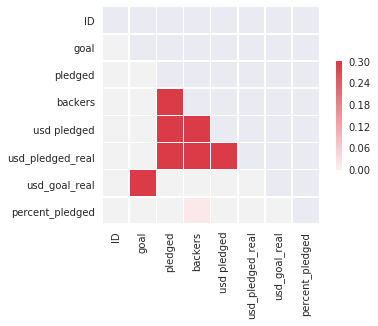

In [63]:
#correlation matrix for the numerical variables
corr = kickstarternew.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


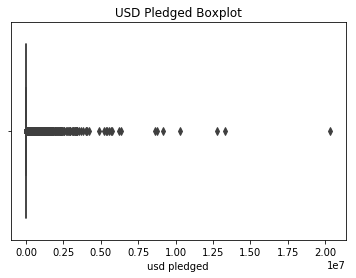

In [13]:
sns.boxplot(kickstarternew['usd pledged'])
plt.title('USD Pledged Boxplot')
plt.show()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


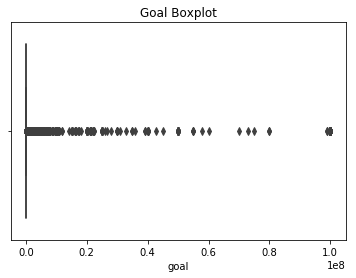

In [21]:
sns.boxplot(kickstarternew['goal'])
plt.title('Goal Boxplot')
plt.show()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


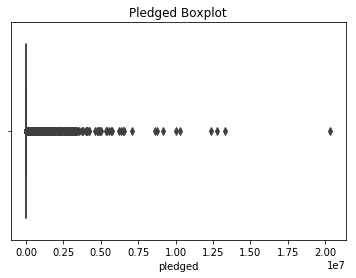

In [22]:
sns.boxplot(kickstarternew['pledged'])
plt.title('Pledged Boxplot')
plt.show()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


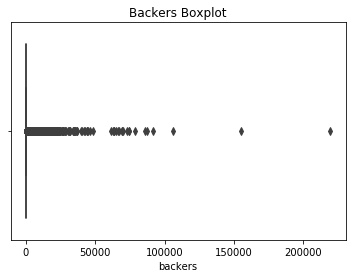

In [17]:
sns.boxplot(kickstarternew['backers'])
plt.title('Backers Boxplot')
plt.show()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


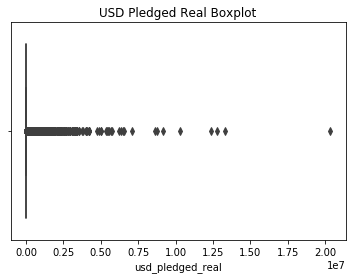

In [20]:
sns.boxplot(kickstarternew['usd_pledged_real'])
plt.title('USD Pledged Real Boxplot')
plt.show()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


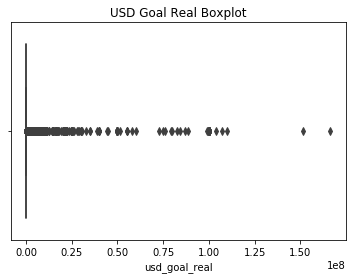

In [23]:
sns.boxplot(kickstarternew['usd_goal_real'])
plt.title('USD Goal Real Boxplot')
plt.show()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


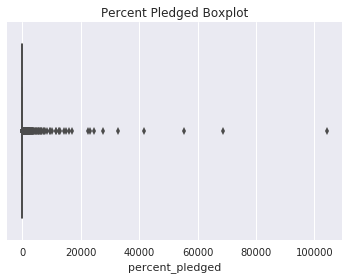

In [52]:
sns.boxplot(kickstarternew['percent_pledged'])
plt.title('Percent Pledged Boxplot')
plt.show()

In [25]:
kickstarternew['category'].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People', 'Art',
       'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware', 'Software',
       'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear', 'Festivals',
       'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

In [26]:
kickstarternew['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


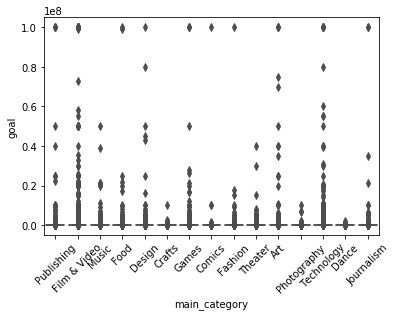

In [27]:
#boxplots of goal by main category
g = sns.boxplot(x="main_category", y="goal", data=kickstarternew, color = "gray")
plt.setp(g.get_xticklabels(), rotation=45)
plt.show()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


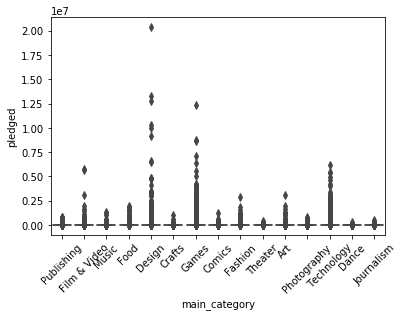

In [39]:
#boxplots of pledged by main category
g = sns.boxplot(x="main_category", y="pledged", data=kickstarternew, color = "gray")
plt.setp(g.get_xticklabels(), rotation=45)
plt.show()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


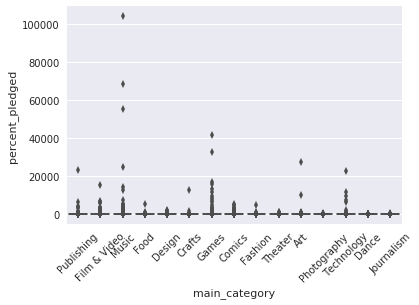

In [53]:
#boxplots of percent pledged by main category
g = sns.boxplot(x="main_category", y="percent_pledged", data=kickstarternew, color = "gray")
plt.setp(g.get_xticklabels(), rotation=45)
plt.show()

#music and games outperform the

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


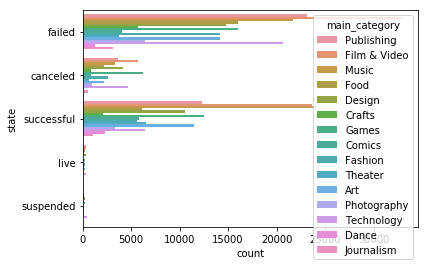

In [30]:
sns.countplot(y="state", data=kickstarternew,
             hue="main_category")
sns.xlabel=("Customer Count")
sns.ylabel=("Customers who switch")
plt.show()

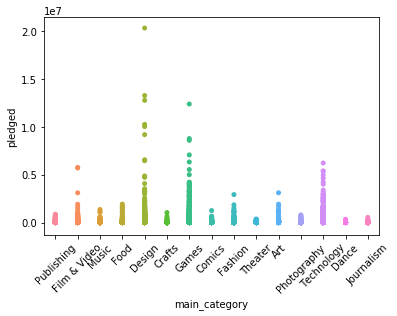

In [38]:
#pledged by main category
g = sns.stripplot(x="main_category", y="pledged", data=kickstarternew)
plt.setp(g.get_xticklabels(), rotation=45)
plt.show()

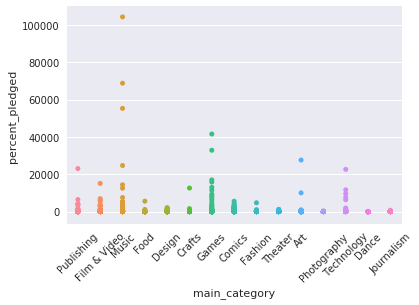

In [58]:
#percentage pledged by main category
g = sns.stripplot(x="main_category", y="percent_pledged", data=kickstarternew)
plt.setp(g.get_xticklabels(), rotation=45)
plt.show()

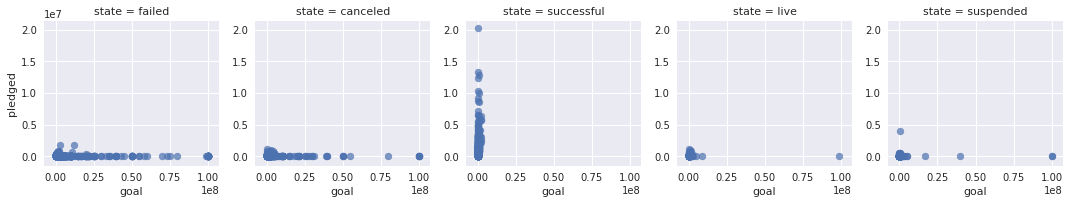

In [42]:
sns.set(style="darkgrid")

g = sns.FacetGrid(kickstarternew, col="state")
g.map(plt.scatter, "goal", "pledged", alpha=.7)
g.add_legend();
plt.show()